# Regressão Logística usando Softmax no Iris dataset - PyTorch

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import torch
from sklearn.datasets import load_iris

## Leitura, normalização e visualização dos dados

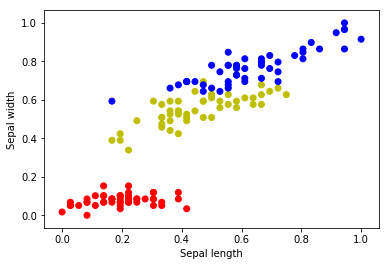

In [2]:
iris = load_iris()
X = torch.Tensor(iris.data[:,::2])  # comprimento das sépalas e pétalas, indices 0 e 2

# normalização dos dados
Xc = X - torch.min(X, 0, keepdim=True)[0]
Xc /= torch.max(Xc, 0, keepdim=True)[0]

Y = torch.from_numpy(iris.target)

colors = np.array(['r','y','b'])
plt.scatter(Xc[:, 0].numpy(), Xc[:, 1].numpy(), c=colors[Y.numpy()])
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()

## Convertendo rótulos na codificação 'one-hot' - categórico

In [3]:
def oneHotIt(Y, n_classes):
    ones = torch.sparse.torch.eye(n_classes)
    return ones.index_select(0,Y)

In [4]:
Y_oh = oneHotIt(Y, 3) 
print(Y[0:5])
print(Y_oh[0:5])


 0
 0
 0
 0
 0
[torch.LongTensor of size 5]


 1  0  0
 1  0  0
 1  0  0
 1  0  0
 1  0  0
[torch.FloatTensor of size 5x3]



## Construindo o modelo da rede

In [5]:
n_classes = 3 

from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F

class _classifier(nn.Module):
    def __init__(self, nlabel):
        super(_classifier, self).__init__()
        self.main = nn.Sequential(
            nn.Linear(2, 64),
            nn.ReLU(),
            nn.Linear(64, nlabel),
        )
 
    def forward(self, input):
        return self.main(input)

model = _classifier(n_classes)
print(model)

_classifier (
  (main): Sequential (
    (0): Linear (2 -> 64)
    (1): ReLU ()
    (2): Linear (64 -> 3)
  )
)


## Compilação do modelo

In [6]:
import torch.optim as optim

criterion = nn.MultiLabelSoftMarginLoss()
optimizer = optim.Adam(model.parameters())

## Laço principal de treinamento da Regressão Logística por Softmax

In [7]:
epochs = 300
loss_history = []
for epoch in range(epochs):
    losses = []
    for i, sample in enumerate(Xc):
        inputv = Variable(torch.FloatTensor(sample)).view(1, -1)
        labelsv = Variable(torch.FloatTensor(Y_oh[i])).view(1, -1)
         
        output = model(inputv)
        loss = criterion(output, labelsv)
 
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        losses.append(loss.data.mean())
        
    print('[%d/%d] Loss: %.3f' % (epoch+1, epochs, np.mean(losses)))
    loss_history.append(np.mean(losses))

[1/300] Loss: 0.675
[2/300] Loss: 0.603
[3/300] Loss: 0.557
[4/300] Loss: 0.502
[5/300] Loss: 0.452
[6/300] Loss: 0.415
[7/300] Loss: 0.389
[8/300] Loss: 0.370
[9/300] Loss: 0.355
[10/300] Loss: 0.344
[11/300] Loss: 0.335
[12/300] Loss: 0.327
[13/300] Loss: 0.320
[14/300] Loss: 0.314
[15/300] Loss: 0.309
[16/300] Loss: 0.303
[17/300] Loss: 0.299
[18/300] Loss: 0.294
[19/300] Loss: 0.290
[20/300] Loss: 0.286
[21/300] Loss: 0.282
[22/300] Loss: 0.278
[23/300] Loss: 0.274
[24/300] Loss: 0.270
[25/300] Loss: 0.267
[26/300] Loss: 0.263
[27/300] Loss: 0.260
[28/300] Loss: 0.256
[29/300] Loss: 0.253
[30/300] Loss: 0.250
[31/300] Loss: 0.246
[32/300] Loss: 0.243
[33/300] Loss: 0.240
[34/300] Loss: 0.236
[35/300] Loss: 0.233
[36/300] Loss: 0.230
[37/300] Loss: 0.227
[38/300] Loss: 0.224
[39/300] Loss: 0.221
[40/300] Loss: 0.218
[41/300] Loss: 0.215
[42/300] Loss: 0.211
[43/300] Loss: 0.209
[44/300] Loss: 0.206
[45/300] Loss: 0.203
[46/300] Loss: 0.200
[47/300] Loss: 0.197
[48/300] Loss: 0.194
[

## Visualizando a minimização da Perda durante o treinamento


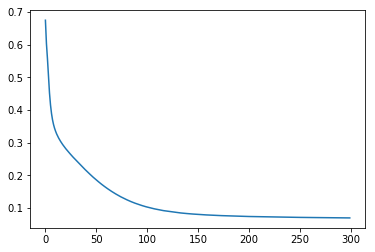

In [8]:
plt.plot(loss_history)

## Cálculo do desempenho do resultado


In [9]:
correct = 0
total = Y.size(0)
for i, sample in enumerate(Xc):
    inputv = Variable(torch.FloatTensor(sample)).view(1, -1)
    labelsv = Variable(torch.FloatTensor(Y_oh[i])).view(1, -1)
    outputs = model(inputv)
    _, predicted = torch.max(outputs.data, 1)
    correct += int((int(predicted.numpy()) == Y[i]))

print('Accuracy: %d, %d%%' % (correct, 
    100 * correct / total))

Accuracy: 146, 97%
